<a href="https://colab.research.google.com/github/AMALBSOMAN/GUVI-Tasks/blob/main/GUVI_Task4_Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
df1 = pd.read_csv('college_1.csv')
df2 = pd.read_csv('college_2.csv')

In [3]:
df1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [4]:
df2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [5]:
df = df1.merge(df2,how='outer')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [6]:
print(df1.shape,df2.shape,df.shape)

(84, 7) (35, 9) (119, 9)


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [7]:
df[df['CodeKata Score']>15000].to_csv('Exceeded expectations.csv')

In [8]:
df[(df['CodeKata Score']<15000) & (df['CodeKata Score']>10000)].to_csv('Reached_expectations.csv')
df[(df['CodeKata Score']<10000) & (df['CodeKata Score']>7000)].to_csv('Needs_Improvement.csv')
df[df['CodeKata Score']<7000].to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [9]:
print('Average previous week geekoins is',df['Previous Geekions'].mean(),'and this week geekoins is',df['CodeKata Score'].mean())

Average previous week geekoins is 3842.3529411764707 and this week geekoins is 4051.764705882353


###### No of students participated 

In [10]:
df[df['CodeKata Score']!=0]['CodeKata Score'].count()

112

###### #Average completion of python course or my_sql or python english or computational thinking

In [11]:
print('Average completion of python is',df['python'].mean())
print('Average completion of python english is',df['python_en'].mean())
print('Average completion of computational thinking is',df['computational_thinking'].mean())

Average completion of python is 54.35294117647059
Average completion of python english is 29.65714285714286
Average completion of computational thinking is 2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [12]:
df.nlargest(3, ['CodeKata Score'])['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [13]:
df.nlargest(3, ['Previous Geekions'])['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

In [14]:
#df[(df['Department']=='Computer Science and Engineering')]['CodeKata Score'].mean()

5079.761904761905

In [15]:
#for i in df['Department'].unique():
#  data = []
#  keys = []
#  print(i)
#  data.append(df[(df['Department']==i)]['CodeKata Score'].mean())
#  keys.append(i)
#  print(data)
#  print(keys)
#plt.pie(data, labels=keys, autopct='%.0f%%')
#plt.show()

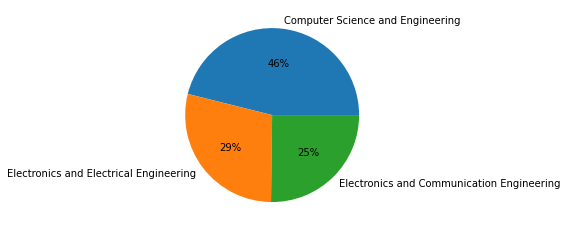

In [16]:
data = [df[(df['Department']=='Computer Science and Engineering')]['CodeKata Score'].mean(), df[(df['Department']=='Electronics and Electrical Engineering')]['CodeKata Score'].mean(), df[(df['Department']=='Electronics and Communication Engineering')]['CodeKata Score'].mean()]
keys = ['Computer Science and Engineering', 'Electronics and Electrical Engineering','Electronics and Communication Engineering']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [17]:
#students = df[(df['Department']=='Computer Science and Engineering')].nlargest(3, ['CodeKata Score'])['Name']
#codekata_scores_cs = df[(df['Department']=='Computer Science and Engineering')].nlargest(3, ['CodeKata Score'])['CodeKata Score']

In [30]:
students_cs = df[(df['Department']=='Computer Science and Engineering')].nlargest(3, ['CodeKata Score'])['Name']
students_ee = df[(df['Department']=='Electronics and Electrical Engineering')].nlargest(3, ['CodeKata Score'])['Name']
students_ec = df[(df['Department']=='Electronics and Communication Engineering')].nlargest(3, ['CodeKata Score'])['Name']

In [31]:
codekata_scores_cs = df[(df['Department']=='Computer Science and Engineering')].nlargest(3, ['CodeKata Score'])['CodeKata Score']
codekata_scores_ee = df[(df['Department']=='Electronics and Electrical Engineering')].nlargest(3, ['CodeKata Score'])['CodeKata Score']
codekata_scores_ec = df[(df['Department']=='Electronics and Communication Engineering')].nlargest(3, ['CodeKata Score'])['CodeKata Score']

In [33]:
cs_top=pd.concat([students_cs,codekata_scores_cs],axis=1)
cs_top.index = students_cs
ee_top=pd.concat([students_ee,codekata_scores_ee],axis=1)
ee_top.index = students_ee
ec_top=pd.concat([students_ec,codekata_scores_ec],axis=1)
ec_top.index = students_ec

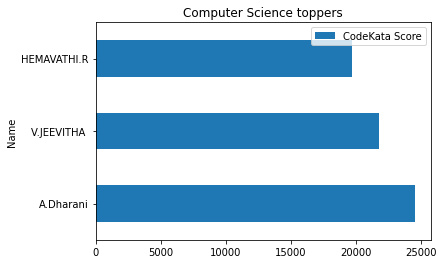

In [40]:
cs_top.plot.barh(title = 'Computer Science toppers')

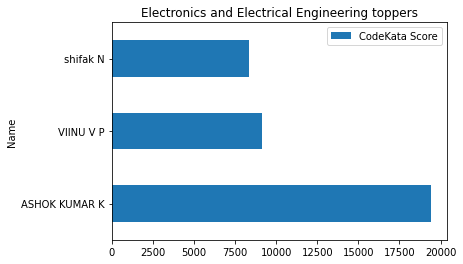

In [41]:
ee_top.plot.barh(title = 'Electronics and Electrical Engineering toppers')

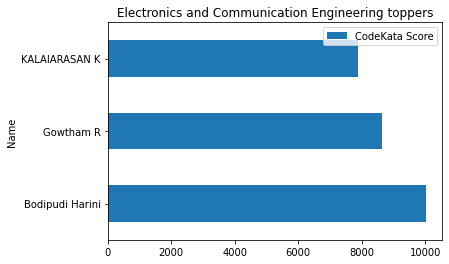

In [42]:
ec_top.plot.barh(title = 'Electronics and Communication Engineering toppers')